In [95]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from colormap import *
import umap

In [61]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/scv_data_full.csv"
load_raw_data = pd.read_csv(raw_data_path)

# combine detail
detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes'
path_name_after_no='_all_geneepoch300check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.5N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p5smoW0.1binTrue/detail_e300.csv'
load_cellDancer=pd.DataFrame()
for i in range(1,11):
    detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
    detail=pd.read_csv(detail_path)
    
    detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
    detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

    load_cellDancer=load_cellDancer.append(detail)
    
load_cellDancer=load_cellDancer.reset_index(drop=True)
load_cellDancer_bkup=load_cellDancer.copy()

# define output path
output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_umap'

In [62]:
onegene_cluster_info=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list[0]].clusters
onegene_cluster_info
# load_cellDancer
alpha_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='alpha')

In [63]:
alpha_df

gene_name,0610010F05Rik,0610011F06Rik,0610030E20Rik,1110002L01Rik,1110034G24Rik,1500009L16Rik,1700011H14Rik,1700023F06Rik,1700026L06Rik,1700086L19Rik,...,Zfp90,Zfp949,Zfpm1,Zfr2,Zim1,Zmym5,Znrf2,Zscan26,Zswim5,Zwint
cellIndex,,,,,,,,,,,,,,,,,,,,,
0,0.129464,0.420811,0.005714,0.112705,0.004883,0.001198,0.006891,0.015419,0.002728,0.002259,...,0.004327,0.209692,0.050648,0.379101,0.130515,0.036831,0.006388,0.142510,0.140570,0.004502
1,0.128636,0.537827,0.006056,0.135913,0.006343,0.001917,0.002664,0.012546,0.003786,0.005534,...,0.004855,0.203405,0.042250,0.151324,0.112068,0.040839,0.009095,0.148131,0.073135,0.006226
2,0.126398,0.388970,0.005896,0.136364,0.004362,0.002000,0.006867,0.012167,0.003030,0.003379,...,0.008971,0.211964,0.043383,0.130650,0.133173,0.046772,0.006399,0.146023,0.147231,0.003476
3,0.116344,0.549544,0.005030,0.094172,0.006446,0.001916,0.003676,0.012805,0.004061,0.005517,...,0.006936,0.223170,0.048456,0.124620,0.113964,0.042983,0.007613,0.151141,0.106218,0.004063
4,0.095394,0.551009,0.005865,0.150298,0.004288,0.001910,0.006865,0.012036,0.003620,0.005142,...,0.010928,0.221190,0.046789,0.122855,0.114064,0.026732,0.004415,0.155943,0.177748,0.004716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,0.121660,0.499751,0.009840,0.162722,0.004326,0.000909,0.006924,0.013445,0.002839,0.002693,...,0.012545,0.209083,0.049412,0.129121,0.117405,0.034824,0.006564,0.155435,0.223484,0.004287
3692,0.134261,0.538968,0.008039,0.143716,0.005158,0.000553,0.006879,0.006083,0.003765,0.005397,...,0.005875,0.216891,0.039287,0.113163,0.103652,0.036720,0.007044,0.148962,0.175431,0.006197
3693,0.113357,0.545735,0.009153,0.099819,0.005734,0.001924,0.002920,0.011776,0.004061,0.005534,...,0.005979,0.210932,0.038604,0.154633,0.136832,0.043011,0.009184,0.142942,0.066620,0.006524


In [213]:
beta_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='beta')

In [214]:
gamma_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='gamma')

In [220]:
alpha_beta_gamma_df=pd.concat([alpha_df,beta_df,gamma_df],axis=1)

In [226]:
alpha_beta_gamma_df

gene_name,0610010F05Rik,0610011F06Rik,0610030E20Rik,1110002L01Rik,1110034G24Rik,1500009L16Rik,1700011H14Rik,1700023F06Rik,1700026L06Rik,1700086L19Rik,...,Zfp90,Zfp949,Zfpm1,Zfr2,Zim1,Zmym5,Znrf2,Zscan26,Zswim5,Zwint
cellIndex,,,,,,,,,,,,,,,,,,,,,
0,0.129464,0.420811,0.005714,0.112705,0.004883,0.001198,0.006891,0.015419,0.002728,0.002259,...,0.141516,0.269662,0.212484,0.279039,0.696700,0.296544,0.140715,0.344412,0.290316,0.363418
1,0.128636,0.537827,0.006056,0.135913,0.006343,0.001917,0.002664,0.012546,0.003786,0.005534,...,0.141247,0.267575,0.213713,0.290424,0.701345,0.293799,0.139767,0.340656,0.291213,0.359869
2,0.126398,0.388970,0.005896,0.136364,0.004362,0.002000,0.006867,0.012167,0.003030,0.003379,...,0.140677,0.270356,0.213085,0.298220,0.717447,0.292528,0.142639,0.343115,0.283344,0.362969
3,0.116344,0.549544,0.005030,0.094172,0.006446,0.001916,0.003676,0.012805,0.004061,0.005517,...,0.139117,0.266246,0.211668,0.291200,0.695710,0.293904,0.137496,0.339254,0.296307,0.383066
4,0.095394,0.551009,0.005865,0.150298,0.004288,0.001910,0.006865,0.012036,0.003620,0.005142,...,0.142529,0.267657,0.215259,0.293034,0.697634,0.302286,0.140180,0.339597,0.292858,0.370393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,0.121660,0.499751,0.009840,0.162722,0.004326,0.000909,0.006924,0.013445,0.002839,0.002693,...,0.141503,0.271190,0.212132,0.290886,0.701263,0.299450,0.142789,0.338015,0.296102,0.374023
3692,0.134261,0.538968,0.008039,0.143716,0.005158,0.000553,0.006879,0.006083,0.003765,0.005397,...,0.139801,0.268408,0.216989,0.293026,0.697691,0.295939,0.137836,0.339206,0.298291,0.359463
3693,0.113357,0.545735,0.009153,0.099819,0.005734,0.001924,0.002920,0.011776,0.004061,0.005534,...,0.139727,0.266029,0.214556,0.289185,0.691523,0.294793,0.140715,0.342905,0.292243,0.362210


In [111]:
##### UMAP para ######

In [228]:

def plot_para_umap(para_df,umap_n,umap_n_components,save_path=None,title='alpha'):
    
    # cellID = data_df.loc[data_df['gene_list']==gene]['cellID']
    # data_df_pivot=data_df.pivot(index='cellID', columns='gene_list', values='s0').reindex(cellID)
    # embedding_downsampling_0 = data_df_pivot.iloc[idx_downSampling_embedding]
    

    def get_umap(df,n_neighbors=umap_n, min_dist=0.1, n_components=umap_n_components, metric='euclidean'): 
        fit = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            n_components=n_components,
            metric=metric
        )
        embed = fit.fit_transform(df);
        return(embed)
    umap_alpha=get_umap(para_df)
    
    color_list=solarExtra02
    letter_col = {'Ductal':color_list[0],
                'Ngn3 low EP':color_list[1],
                'Ngn3 high EP':color_list[2],
                'Pre-endocrine':color_list[3],
                'Epsilon':color_list[4],
                'Beta':color_list[5],
                'Alpha':'#F3722C',
                'Delta':'#F8961E'}

    letter_col = {'Ductal':color_list[0],
                'Ngn3 low EP':color_list[1],
                'Ngn3 high EP':color_list[2],
                'Pre-endocrine':color_list[3],
                'Epsilon':color_list[4],
                'Beta':color_list[5],
                'Alpha':'blue',
                'Delta':'green'}
    
    letter_col = {'Ductal':color_list[0],
                'Ngn3 low EP':color_list[1],
                'Ngn3 high EP':color_list[2],
                'Pre-endocrine':color_list[3],
                'Alpha':color_list[5],
                'Beta':'#f6ad2f',
                'Delta':'green',
                'Epsilon':'#FFEE32'}
    letter_col = {'Ductal':color_list[0],
                                            'Ngn3 low EP':color_list[1],
                                            'Ngn3 high EP':color_list[2],
                                            'Pre-endocrine':color_list[3],
                                            'Alpha':'#ff4800',
                                            'Beta':"#B81136",#'#ffb600',#'#f6ad2f',
                                            'Delta':'green',
                                            'Epsilon':'#03B3B0'#'#e05780'#'#fcf300'
                                                     }
    
    colors = list(map(lambda x: letter_col.get(x, 'black'), onegene_cluster_info))

    plt.figure()
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in letter_col.values()]
    
    lgd=plt.legend(markers, letter_col.keys(), numpoints=1,loc='upper left',bbox_to_anchor=(1.01, 1))
    if umap_n_components==2:
        plt.scatter(umap_alpha[:,0], umap_alpha[:,1],c=colors,s=15,alpha=0.5,edgecolor="none")
    elif umap_n_components==3:
        ax = plt.axes(projection ="3d")
        ax.scatter3D(umap_alpha[:,0], umap_alpha[:,1],umap_alpha[:,2], color = colors)
    plt.title(title)
    if save_path is not None:
        plt.savefig(save_path,bbox_inches='tight',bbox_extra_artists=(lgd,))
    return(pd.concat([pd.DataFrame({'umap1':umap_alpha[:,0],'umap2':umap_alpha[:,1]}),onegene_cluster_info],axis=1))
    

In [238]:
color_list

['#3361A5', '#248AF3', '#14B3FF', '#88CEEF', '#FDB31A', '#E42A2A']

,umap1,umap2,clusters
0,-0.633230,9.065692,Pre-endocrine
1,13.535116,8.733130,Ductal
2,-2.901802,9.136596,Alpha
3,16.497746,5.954993,Ductal
4,1.742800,3.096350,Ngn3 high EP
...,...,...,...
3691,-0.885649,7.267618,Pre-endocrine
3692,4.524684,1.811625,Ngn3 high EP
3693,13.582697,9.433279,Ductal
3694,-5.956790,11.383763,Alpha


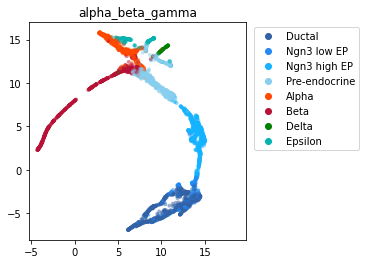

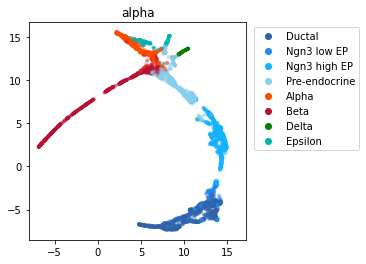

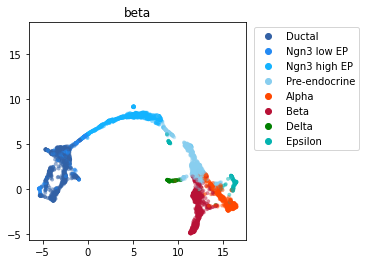

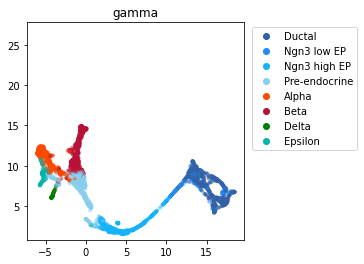

In [252]:


def plot_para_umap_has_data(umap_para,onegene_cluster_info,save_path=None,title='alpha',umap_n_components=2):
    color_list=solarExtra02
    letter_col = {'Ductal':color_list[0],
                                            'Ngn3 low EP':color_list[1],
                                            'Ngn3 high EP':color_list[2],
                                            'Pre-endocrine':color_list[3],
                                            'Alpha':'#ff4800',
                                            'Beta':"#B81136",#'#ffb600',#'#f6ad2f',
                                            'Delta':'green',
                                            'Epsilon':'#03B3B0'#'#e05780'#'#fcf300'
                                                     }
    
    colors = list(map(lambda x: letter_col.get(x, 'black'), onegene_cluster_info))

    plt.figure()
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in letter_col.values()]
    
    lgd=plt.legend(markers, letter_col.keys(), numpoints=1,loc='upper left',bbox_to_anchor=(1.01, 1))
    if umap_n_components==2:
        plt.scatter(umap_para[:,0], umap_para[:,1],c=colors,s=15,alpha=0.5,edgecolor="none",)
        #plt.axis('equal')
        #plt.set_box_aspect(1)
        #plt.axis('scaled')
        plt.axis('square')
        # plt.gca().set_aspect('equal', adjustable='box')
    elif umap_n_components==3:
        ax = plt.axes(projection ="3d")
        ax.scatter3D(umap_para[:,0], umap_para[:,1],umap_para[:,2], color = colors)
    plt.title(title)
    if save_path is not None:
        plt.savefig(save_path,bbox_inches='tight',bbox_extra_artists=(lgd,))
    return(pd.concat([pd.DataFrame({'umap1':umap_para[:,0],'umap2':umap_para[:,1]}),onegene_cluster_info],axis=1))

# a,b,g
umap_para_full_df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/alpha_beta_gamma_02_using/alpha_beta_gamma_umap50.csv')
umap_para=umap_para_full_df[['umap1','umap2']].to_numpy()
onegene_cluster_info=umap_para_full_df.clusters
plot_para_umap_has_data(umap_para,onegene_cluster_info,title='alpha_beta_gamma',save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/alpha_beta_gamma_02_using/alpha_beta_gamma_umap50_square.pdf')

# alpha
umap_para_full_df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_umap/using_bkup/alpha_umap50_pointsize15.csv')
umap_para=umap_para_full_df[['umap1','umap2']].to_numpy()
onegene_cluster_info=umap_para_full_df.clusters
plot_para_umap_has_data(umap_para,onegene_cluster_info,title='alpha',save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_umap/using_bkup/alpha_umap50_pointsize15_square.pdf')

# beta
umap_para_full_df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/using_beta_gamma_bkup/beta_umap50.csv')
umap_para=umap_para_full_df[['umap1','umap2']].to_numpy()
onegene_cluster_info=umap_para_full_df.clusters
plot_para_umap_has_data(umap_para,onegene_cluster_info,title='beta',save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/using_beta_gamma_bkup/beta_umap50_square.pdf')

# gamma
umap_para_full_df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/using_beta_gamma_bkup/gamma_umap50.csv')
umap_para=umap_para_full_df[['umap1','umap2']].to_numpy()
onegene_cluster_info=umap_para_full_df.clusters
plot_para_umap_has_data(umap_para,onegene_cluster_info,title='gamma',save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/using_beta_gamma_bkup/gamma_umap50_square.pdf')




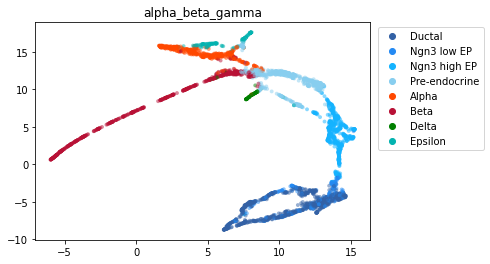

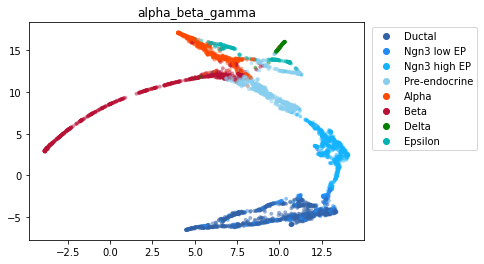

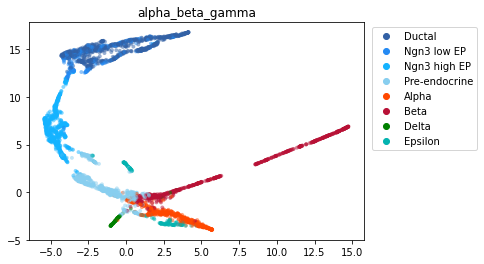

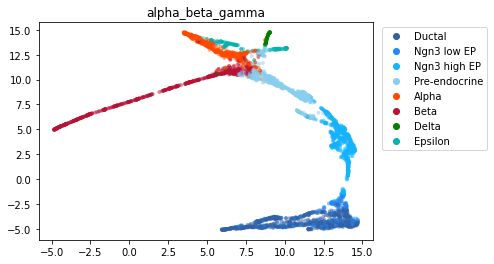

In [236]:
# alpha_beta_gamma

umap_n_list=[25,50,75,100]

for umap_n in umap_n_list:
    save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/alpha_beta_gamma_umap'+str(umap_n)+".pdf"
    title="alpha_beta_gamma"
    umap_para=plot_para_umap(alpha_beta_gamma_df,umap_n,2,save_path,title=title)
    umap_para.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/alpha_beta_gamma_umap'+str(umap_n)+'.csv',index=False)
    


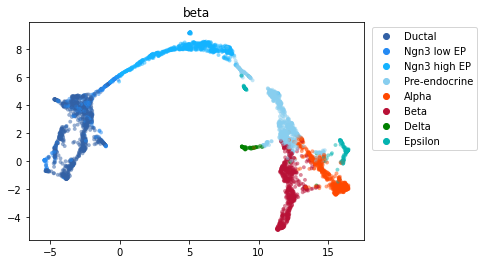

In [232]:
# beta
umap_n_list=[50]

for umap_n in umap_n_list:
    save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/beta_umap'+str(umap_n)+".pdf"
    title="beta"
    umap_para=plot_para_umap(beta_df,umap_n,2,save_path,title=title)
    umap_para.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/beta_umap50.csv',index=False)

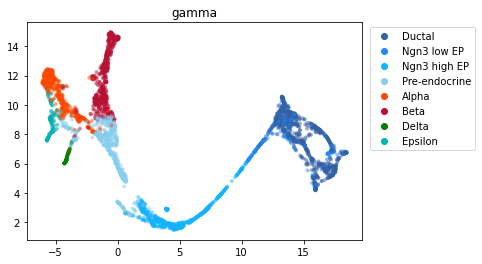

In [233]:
# gamma

umap_n_list=[50]

for umap_n in umap_n_list:
    save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/gamma_umap'+str(umap_n)+".pdf"
    title="gamma"
    umap_para=plot_para_umap(gamma_df,umap_n,2,save_path,title=title)
    umap_para.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/gamma_umap50.csv',index=False)

In [ ]:
# alpha

umap_n_list=[50]

for umap_n in umap_n_list:
    save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_umap/alpha_umap'+str(umap_n)+".pdf"
    umap_alpha=plot_para_umap(alpha_df,umap_n,2,save_path)
    umap_alpha.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_umap/alpha_umap50.csv',index=False)

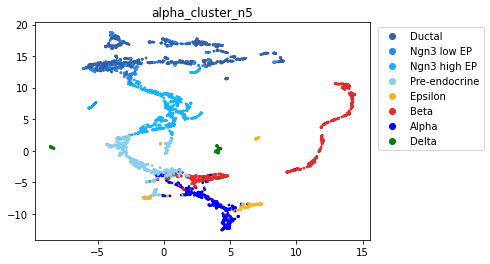

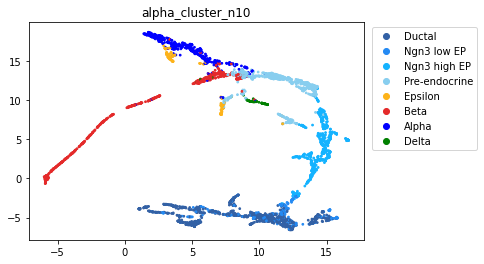

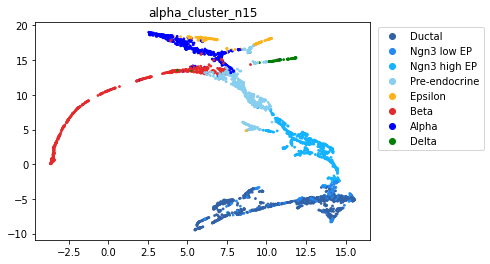

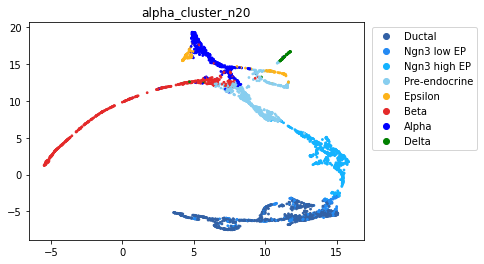

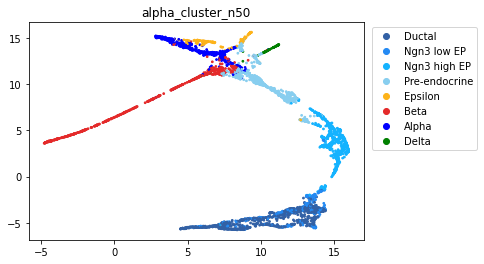

In [99]:
umap_n_list=[5,10,15,20,50]
for umap_n in umap_n_list:
    plot_para_umap(alpha_df,umap_n,2)

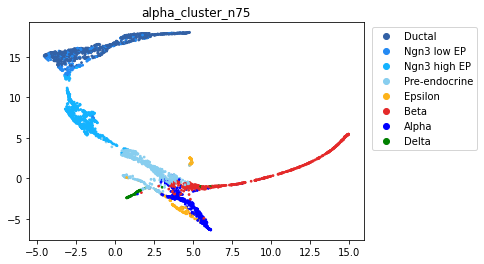

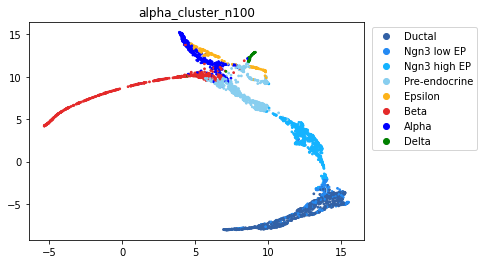

In [100]:
umap_n_list=[75,100]
for umap_n in umap_n_list:
    plot_para_umap(alpha_df,umap_n,2)

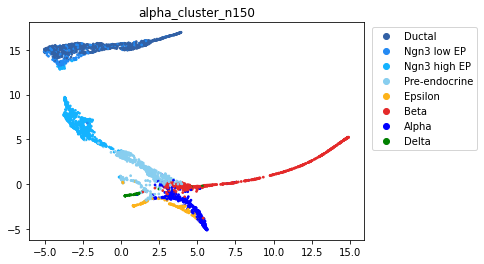

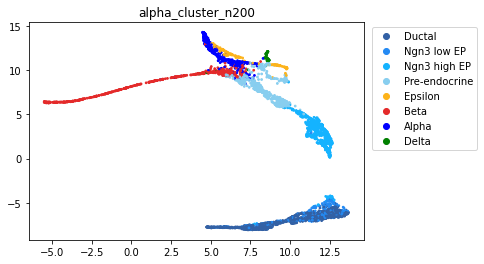

In [101]:
umap_n_list=[150,200]
for umap_n in umap_n_list:
    plot_para_umap(alpha_df,umap_n,2)

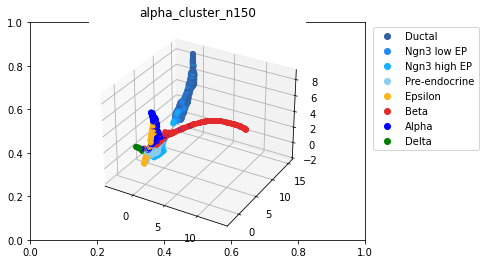

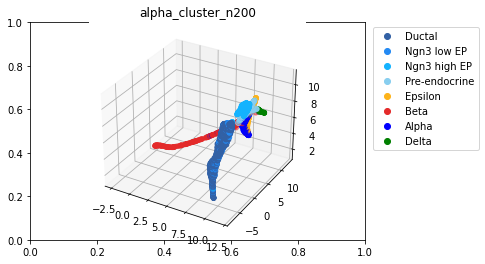

In [109]:
umap_n_list=[150,200]
for umap_n in umap_n_list:
    plot_para_umap(alpha_df,umap_n,3)

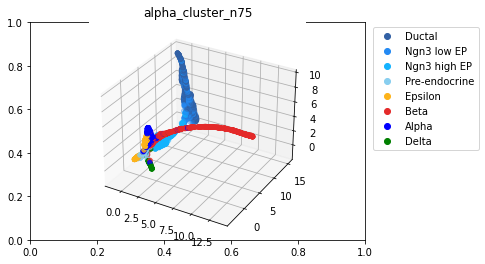

In [110]:
umap_n_list=[75]
for umap_n in umap_n_list:
    plot_alpha_umap(alpha_df,umap_n,3)

In [ ]:
##### END UMAP ######

In [ ]:
##### PCA ######
# Notice: found that PCA looks worse, now using umap #

In [115]:
from sklearn.decomposition import PCA


In [132]:

def plot_alpha_pca(pca_n_components):
    
    # cellID = data_df.loc[data_df['gene_list']==gene]['cellID']
    # data_df_pivot=data_df.pivot(index='cellID', columns='gene_list', values='s0').reindex(cellID)
    # embedding_downsampling_0 = data_df_pivot.iloc[idx_downSampling_embedding]
    

    def get_pca(df,pca_n_components): 
        pca=PCA(n_components=pca_n_components)
        pca.fit(alpha_df)
        embedding_downsampling_trans = pca.transform(alpha_df)[:,range(pca_n_components)]
        return(embedding_downsampling_trans)
    pca_alpha=get_pca(alpha_df,pca_n_components)

    set(onegene_cluster_info)
    
    color_list=solarExtra02

    letter_col = {'Ductal':color_list[0],
                'Ngn3 low EP':color_list[1],
                'Ngn3 high EP':color_list[2],
                'Pre-endocrine':color_list[3],
                'Epsilon':color_list[4],
                'Beta':color_list[5],
                'Alpha':'blue',
                'Delta':'green'}
    colors = list(map(lambda x: letter_col.get(x, 'black'), onegene_cluster_info))

    plt.figure()
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in letter_col.values()]
    
    plt.legend(markers, letter_col.keys(), numpoints=1,loc='upper left',bbox_to_anchor=(1.01, 1))
    print(pca_alpha)
    if pca_n_components==2:
        plt.scatter(pca_alpha[:,0], pca_alpha[:,1],c=colors,s=3)
    elif pca_n_components==3:
        ax = plt.axes(projection ="3d")
        ax.scatter3D(pca_alpha[:,0], pca_alpha[:,1],pca_alpha[:,2], color = colors,s=0.5)
    plt.title('alpha_cluster')
    return(pca_alpha)




[[-4.91917561  1.13860107 -1.17131773]
 [-5.04266209 -3.02077193  1.1684296 ]
 [-4.73265996  2.58708974 -2.13026349]
 ...
 [-4.76919764  0.25397567  1.76357186]
 [-4.22272165  5.44003142 -1.27995822]
 [-5.3640114  -2.70194853 -2.5588359 ]]


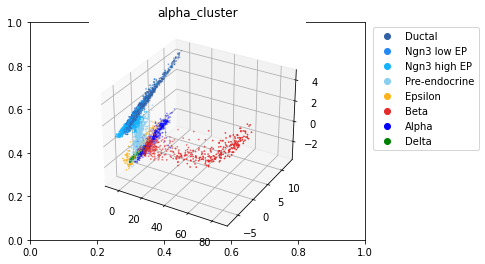

In [133]:
embed=plot_alpha_pca(3)

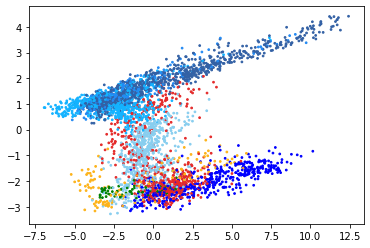

In [135]:
plt.scatter(embed[:,0], embed[:,1],c=colors,s=3)

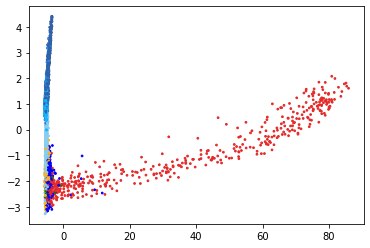

In [137]:
plt.scatter(embed[:,0], embed[:,2],c=colors,s=3)

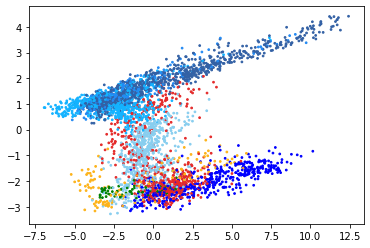

In [138]:
plt.scatter(embed[:,1], embed[:,2],c=colors,s=3)

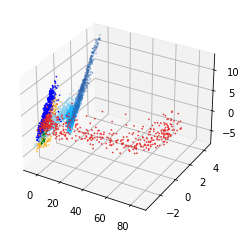

In [140]:

ax = plt.axes(projection ="3d")
ax.scatter3D(embed[:,0], embed[:,2],embed[:,1], color = colors,s=0.5)

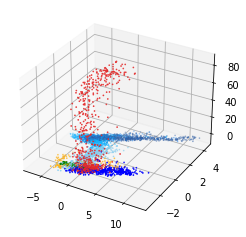

In [141]:

ax = plt.axes(projection ="3d")
ax.scatter3D(embed[:,1], embed[:,2],embed[:,0], color = colors,s=0.5)

In [ ]:
##### END PCA ######

